In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('50_startups.csv')

In [3]:
df[:5]

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Data Exploration 

In [4]:
df.shape

(50, 5)

In [5]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

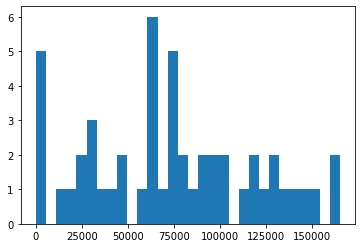

In [6]:
plt.hist(df['R&D Spend'],bins=30);

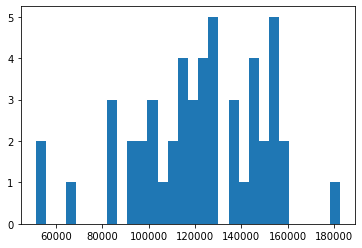

In [7]:
plt.hist(df['Administration'],bins=30);

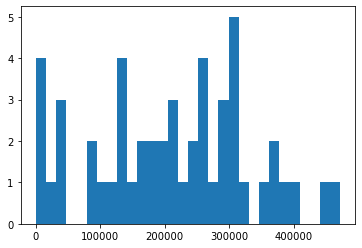

In [8]:
plt.hist(df['Marketing Spend'],bins=30);

### Data Cleansing

In [9]:
state=pd.get_dummies(df['State'],drop_first=True)
state.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [10]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [11]:
df.drop('State',axis=1,inplace=True)

In [12]:
df=pd.concat([df,state],axis=1)

In [13]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


### Model Creation 

In [14]:
df.shape

(50, 6)

In [15]:
X=df.drop('Profit',axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [16]:
y=df['Profit']
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=150)

In [19]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred=lr.predict(X_test)

In [21]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)

In [22]:
score

0.9765529359103458